Question 3

Does downsampling in unbalanced data reduces the prediction accuracy while applying machine learning algorithms?

In [3]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("Dataset/preprocessed_dataset.csv")
df1.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,2,2,84835.0,0,0,0,189,104,379,111,...,1,0,0,0,0,0,1,0,6,51
1,2,4,57091.0,0,0,0,464,5,64,7,...,5,0,0,0,0,1,1,0,1,60
2,2,3,67267.0,0,1,0,134,11,59,15,...,2,0,0,0,0,0,0,0,7,63
3,2,5,32474.0,1,1,0,10,0,1,0,...,7,0,0,0,0,0,0,0,0,54
4,2,4,21474.0,1,0,0,6,16,24,11,...,7,1,0,0,0,0,1,0,6,32


<AxesSubplot:xlabel='Response', ylabel='count'>

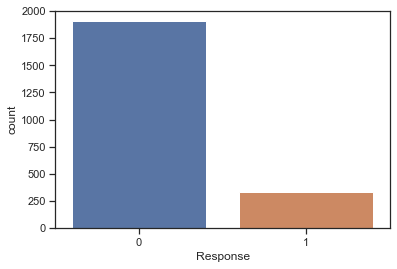

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
sns.countplot(x='Response', data=df1)

In [11]:
from collections import Counter
print(Counter(df1['Response']))

Counter({0: 1906, 1: 334})


It is observed that the data is unbalanced.

Implementaiton of Naive Bayes Algorithm with Unbalanced Dataset

Confusion Matrix 
 [[316  66]
 [ 35  31]] 



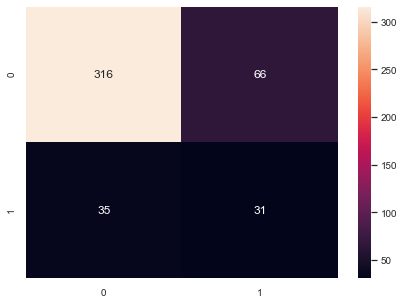

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       382
           1       0.32      0.47      0.38        66

    accuracy                           0.77       448
   macro avg       0.61      0.65      0.62       448
weighted avg       0.81      0.77      0.79       448
 



In [14]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = df1.drop('Response',axis=1)
y = df1.Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


cf_data = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n", cf_data, "\n")

df_cm = pd.DataFrame(cf_data)
plt.figure(figsize=(7,5))
sns.set(font_scale=0.9) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

print("Classification Report \n", classification_report(y_test,y_pred), "\n")


Implementaiton of Decision Tree Algorithm with Unbalanced Dataset

Confusion Matrix 
 [[357  25]
 [ 36  30]] 



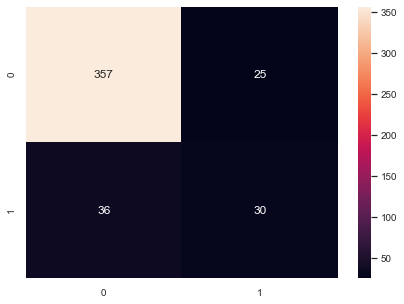

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       382
           1       0.55      0.45      0.50        66

    accuracy                           0.86       448
   macro avg       0.73      0.69      0.71       448
weighted avg       0.85      0.86      0.86       448
 



In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = df1.drop('Response',axis=1)
y = df1.Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


cf_data = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n", cf_data, "\n")

df_cm = pd.DataFrame(cf_data)
plt.figure(figsize=(7,5))
sns.set(font_scale=0.9) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

print("Classification Report \n", classification_report(y_test,y_pred), "\n")


Downsampling

In [20]:
from collections import Counter
print('Data before under-sampling')
print(Counter(df1['Response']))

count_class_0, count_class_1 = df1.Response.value_counts()

# Divide by class
df_class_0 = df1[df1['Response'] == 0]
df_class_1 = df1[df1['Response'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Data after under-sampling:')
print(Counter(df['Response']))

Data before under-sampling
Counter({0: 1906, 1: 334})
Data after under-sampling:
Counter({0: 334, 1: 334})


Implementaiton of Naive Bayes Algorithm after downsampling

Confusion Matrix 
 [[49 10]
 [33 42]] 



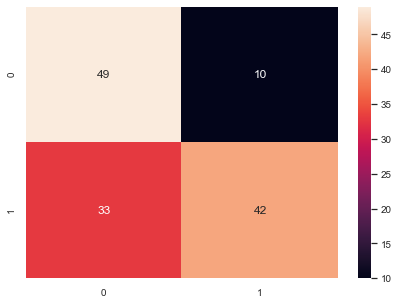

Classification Report 
               precision    recall  f1-score   support

           0       0.60      0.83      0.70        59
           1       0.81      0.56      0.66        75

    accuracy                           0.68       134
   macro avg       0.70      0.70      0.68       134
weighted avg       0.72      0.68      0.68       134
 



In [21]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = df.drop('Response',axis=1)
y = df.Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


cf_data = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n", cf_data, "\n")

df_cm = pd.DataFrame(cf_data)
plt.figure(figsize=(7,5))
sns.set(font_scale=0.9) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

print("Classification Report \n", classification_report(y_test,y_pred), "\n")


Implementaiton of Decision Tree Algorithm after downsampling

Confusion Matrix 
 [[39 20]
 [20 55]] 



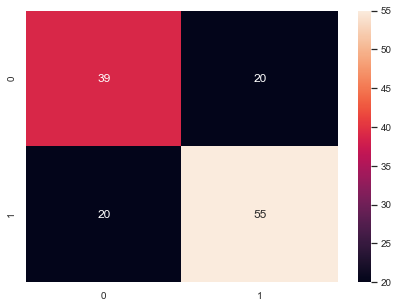

Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66        59
           1       0.73      0.73      0.73        75

    accuracy                           0.70       134
   macro avg       0.70      0.70      0.70       134
weighted avg       0.70      0.70      0.70       134
 



In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = df.drop('Response',axis=1)
y = df.Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


cf_data = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n", cf_data, "\n")

df_cm = pd.DataFrame(cf_data)
plt.figure(figsize=(7,5))
sns.set(font_scale=0.9) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

print("Classification Report \n", classification_report(y_test,y_pred), "\n")


From the result,downsampling in unbalanced data reduces the prediction accuracy while applying machine learning algorithms.